In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.graph_objects as go
import dash_mantine_components as dmc
import networkx as nx
import numpy as np
import json
import pylab
import pandas as pd
from copy  import deepcopy as cp

In [2]:
from tqdm import tqdm

In [5]:
from graph_drawer import draw_graph
from graph_builder import GraphBuilder

from graph_on_single_alt import ng_graph

2024-08-05 14:02:01 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


2024-08-05 14:02:05 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-08-05 14:02:05 INFO: Using device: cpu
2024-08-05 14:02:05 INFO: Loading: tokenize
2024-08-05 14:02:06 INFO: Loading: pos
2024-08-05 14:02:07 INFO: Loading: lemma
2024-08-05 14:02:07 INFO: Loading: depparse
2024-08-05 14:02:08 INFO: Loading: ner
2024-08-05 14:02:13 INFO: Done loading processors!


In [10]:
def make_Graph(n):
    g = nx.Graph()
    g.add_nodes_from(n)
    return(g)

import re

In [38]:
file_name = 'segmentation_dataset/4.txt'
f = open(file_name)

ng_s = []
verbs = []
for line in f:
    if re.sub(r"[\n\t\s]*", "", line) == "":
        continue
    print("====")
    print(line)
    ng_ = ng_graph(line)
    ng_s.append([])
    verbs.append([])
    ng_s[-1] = [ng_.nodes[n]["ng_graph"] for n in ng_.nodes if ng_.nodes[n]["pos"] == "NG"]
    verbs[-1] = make_Graph([n for n in ng_.nodes if ng_.nodes[n]["pos"] == "VERB"])

====
Под концептуальной моделью ИИП будем понимать описание требований общих свойств и принципов функционирования ИИП

--------------------------------------------------------------------------------
под                 case                ADP                 моделью
концептуальный      amod                ADJ                 моделью
модель              obl                 NOUN                понимать
--------------------------------------------------------------------------------
иип                 nmod                PROPN               функционирования
быть                aux                 AUX                 понимать
понимать            root                VERB                ИИП
--------------------------------------------------------------------------------
описание            obj                 NOUN                понимать
требование          nmod                NOUN                описание
общий               amod                ADJ                 свойств
-----------------

--------------------------------------------------------------------------------
реализовать         root                VERB                данных
взаимодействие      obj                 NOUN                реализует
между               case                ADP                 компонентами
--------------------------------------------------------------------------------
компонент           nmod                NOUN                взаимодействие
система             nmod                NOUN                компонентами
и                   cc                  CCONJ               источниками
--------------------------------------------------------------------------------
источник            conj                NOUN                компонентами
данные              nmod                NOUN                источниками
--------------------------------------------------------------------------------
('взаимодействие', 'реализовать')
('компонент', 'взаимодействие')
('система', 'компонент')
('источник

--------------------------------------------------------------------------------
аннотация           nsubj:pass          NOUN                пробурены
первый              amod                ADJ                 скважины
нефтяной            amod                ADJ                 скважины
--------------------------------------------------------------------------------
скважина            nsubj               NOUN                перестают
быть                aux:pass            AUX                 пробурены
пробурить           root                VERB                фонтанировать
--------------------------------------------------------------------------------
в                   case                ADP                 нефтяники
сегодня             advmod              ADV                 научились
нефтяник            nsubj               NOUN                научились
--------------------------------------------------------------------------------
научиться           conj                VERB

--------------------------------------------------------------------------------
выдвижение          root                NOUN                поведения
гипотеза            nmod                NOUN                выдвижение
на                  case                ADP                 основе
--------------------------------------------------------------------------------
основа              nmod                NOUN                гипотез
текущий             amod                VERB                информации
информация          nmod                NOUN                основе
--------------------------------------------------------------------------------
и                   cc                  CCONJ               предсказание
предсказание        conj                NOUN                выдвижение
будущий             amod                ADJ                 событий
--------------------------------------------------------------------------------
событие             nmod                NOUN      

--------------------------------------------------------------------------------
управление          nsubj               NOUN                должно
система             nmod                NOUN                Управление
учитывать           amod                VERB                аспекты
--------------------------------------------------------------------------------
аспект              conj                NOUN                Управление
конкретный          amod                ADJ                 условий
условие             nmod                NOUN                аспекты
--------------------------------------------------------------------------------
должен              root                ADJ                 целей
далее               advmod              ADV                 строиться
строиться           xcomp               VERB                должно
--------------------------------------------------------------------------------
в                   case                ADP                 

--------------------------------------------------------------------------------
многосеточный       amod                ADJ                 распараллеливание
распараллеливание   nsubj               NOUN                представляется
вычисление          nmod                NOUN                распараллеливание
--------------------------------------------------------------------------------
при                 case                ADP                 аппроксимации
вариационный        amod                ADJ                 методе
метод               nmod                NOUN                вычислений
--------------------------------------------------------------------------------
моделирование       nmod                NOUN                методе
множество           appos               NOUN                распараллеливание
сеточный            amod                ADJ                 точек
--------------------------------------------------------------------------------
точка               nm

--------------------------------------------------------------------------------
неявный             amod                ADJ                 схема
схема               nsubj               NOUN                устойчива
для                 case                ADP                 схемы
--------------------------------------------------------------------------------
решение             nmod                NOUN                вектором
начально            obl                 ADV                 краевой
краевой             amod                ADJ                 задачи
--------------------------------------------------------------------------------
задача              nmod                NOUN                решения
уравнение           nmod                NOUN                задачи
абсолютно           obl                 ADV                 устойчива
--------------------------------------------------------------------------------
устойчивый          root                ADJ                 слоя


--------------------------------------------------------------------------------
на                  case                ADP                 рис
рис                 obl                 NOUN                представлены
представить         root                VERB                моменты
--------------------------------------------------------------------------------
аппроксимация       nsubj:pass          NOUN                представлены
множество           nmod                NOUN                аппроксимации
достижимость        nmod                NOUN                множеств
--------------------------------------------------------------------------------
система             nmod                NOUN                достижимости
соответственно      obl                 ADV                 моменты
в                   case                ADP                 моменты
--------------------------------------------------------------------------------
момент              obl                 NOUN  

--------------------------------------------------------------------------------
в                   case                ADP                 работе
этот                det                 DET                 работе
работа              obl                 NOUN                определяется
--------------------------------------------------------------------------------
также               advmod              ADV                 определяется
на                  case                ADP                 решетке
решетка             obl                 NOUN                определяется
--------------------------------------------------------------------------------
определять          root                VERB                импликацию
умножение           nsubj:pass          NOUN                определяется
элемент             nmod                NOUN                умножение
--------------------------------------------------------------------------------
что                 nsubj               P

--------------------------------------------------------------------------------
такой               det                 DET                 образом
образ               obl                 NOUN                присутствуют
при                 case                ADP                 вакцинотерапии
--------------------------------------------------------------------------------
вакцинотерапия      obl                 NOUN                присутствуют
присутствовать      root                VERB                клеток
два                 nummod:gov          NUM                 механизма
--------------------------------------------------------------------------------
механизм            nsubj               NOUN                присутствуют
приводить           acl                 VERB                механизма
к                   case                ADP                 гибели
--------------------------------------------------------------------------------
гибель              obl                 

--------------------------------------------------------------------------------
множество           obl                 NOUN                называется
достижимость        nmod                NOUN                Множеством
система             nmod                NOUN                состояний
--------------------------------------------------------------------------------
при                 case                ADP                 позиции
из                  case                ADP                 состояний
позиция             nmod                NOUN                системы
--------------------------------------------------------------------------------
называться          root                VERB                где
множество           nsubj               NOUN                называется
состоять            acl                 VERB                множество
--------------------------------------------------------------------------------
всевозможный        amod                ADJ          

--------------------------------------------------------------------------------
такой               det                 DET                 положение
положение           nsubj               NOUN                может
дело                nmod                NOUN                положение
--------------------------------------------------------------------------------
впоследствии        advmod              ADV                 может
мочь                root                VERB                безопасность
серьезно            advmod              ADV                 повлиять
--------------------------------------------------------------------------------
влиять              xcomp               VERB                может
на                  case                ADP                 безопасность
национальный        amod                ADJ                 безопасность
--------------------------------------------------------------------------------
экономический       amod                ADJ       

--------------------------------------------------------------------------------
особый              amod                ADJ                 место
место               obj                 NOUN                занимает
в                   case                ADP                 монографии
--------------------------------------------------------------------------------
монография          nmod                NOUN                место
занимать            root                VERB                безопасности
так                 advmod              ADV                 называемый
--------------------------------------------------------------------------------
называть            acl                 VERB                подход
витальный           amod                ADJ                 подход
подход              nsubj               NOUN                занимает
--------------------------------------------------------------------------------
суть                nsubj               NOUN             

--------------------------------------------------------------------------------
-                   punct               PUNCT               SEGMENT
segment             root                PROPN               -
brake               flat:foreign        PROPN               SEGMENT
--------------------------------------------------------------------------------
('brake', 'segment')
====
Интегрирование систем методом Рунге Кутта го порядка

--------------------------------------------------------------------------------
интегрирование      root                NOUN                порядка
система             nmod                NOUN                Интегрирование
метод               nmod                NOUN                Интегрирование
--------------------------------------------------------------------------------
рунг                nmod                PROPN               методом
кутта               flat:name           PROPN               Рунге
го                  amod                ADJ   

--------------------------------------------------------------------------------
этот                det                 DET                 модели
модель              nsubj               NOUN                отображаются
отображать          root                VERB                моделей
--------------------------------------------------------------------------------
на                  case                ADP                 дисплее
дисплее             obl                 NOUN                отображаются
компьютер           nmod                NOUN                дисплее
--------------------------------------------------------------------------------
с                   case                ADP                 блока
помощь              fixed               NOUN                с
блок                obl                 NOUN                отображаются
--------------------------------------------------------------------------------
виртуальный         amod                ADJ               

--------------------------------------------------------------------------------
-                   punct               PUNCT               SEGMENT
segment             root                PROPN               -
brake               flat:foreign        PROPN               SEGMENT
--------------------------------------------------------------------------------
('brake', 'segment')
====
Применение принудительного межклетевого охлаждения при прокатке в чистовой группе позволяет повысить ее производительность в зависимости от прокатываемого сортамента до Для реализации энергосберегающего управления ЛПК печи стан разработана структурная схема АСУ с оптимизацией режимов прокатки в основу которой положена двухуровневая структура обеспечивающая управление температурой металла как в режиме прогноза так и в реальном масштабе времени

--------------------------------------------------------------------------------
применение          nsubj               NOUN                позволяет
принудительный 

--------------------------------------------------------------------------------
в                   advmod              ADP                 представляет
настоящий           fixed               ADJ                 В
время               fixed               NOUN                В
--------------------------------------------------------------------------------
моделирование       nsubj               NOUN                представляет
взаимодействие      nmod                NOUN                моделирование
экологический       amod                ADJ                 систем
--------------------------------------------------------------------------------
и                   cc                  CCONJ               экономических
экономический       conj                ADJ                 экологических
система             nmod                NOUN                взаимодействия
--------------------------------------------------------------------------------
с                   case                AD

--------------------------------------------------------------------------------
один                obl                 NUM                 является
из                  case                ADP                 свойств
ключевой            amod                ADJ                 свойств
--------------------------------------------------------------------------------
свойство            nmod                NOUN                Одним
нефть               nmod                NOUN                свойств
являться            root                VERB                воду
--------------------------------------------------------------------------------
то                  nsubj               PRON                является
что                 mark                SCONJ               имеет
она                 nsubj               PRON                имеет
--------------------------------------------------------------------------------
иметь               acl                 VERB                то
меньший 

--------------------------------------------------------------------------------
обзор               root                NOUN                углеводородов
оборудование        nmod                NOUN                Обзор
использовать        acl                 VERB                оборудования
--------------------------------------------------------------------------------
для                 case                ADP                 бурения
бурение             obl                 NOUN                использующегося
при                 case                ADP                 добыче
--------------------------------------------------------------------------------
добыча              obl                 NOUN                использующегося
углеводород         nmod                NOUN                добыче
--------------------------------------------------------------------------------
('оборудование', 'обзор')
('использовать', 'оборудование')
('бурение', 'использовать')
('добыча', 'использова

--------------------------------------------------------------------------------
в                   case                ADP                 случае
случай              obl                 NOUN                требуется
трактовка           nmod                NOUN                случае
--------------------------------------------------------------------------------
мнение              nmod                NOUN                трактовки
агент               nmod                NOUN                мнений
например            obl                 ADV                 значений
--------------------------------------------------------------------------------
как                 mark                SCONJ               значений
значение            nmod                NOUN                мнений
вероятность         nmod                NOUN                значений
--------------------------------------------------------------------------------
их                  det                 DET                 г

In [39]:
def display(G):
    print("---")
    for n in G.nodes:
        print(n)
    print("---")
    for e in G.edges:
        print(e)

In [40]:
def graph_sim(G1, G2):
    sim = 0
    for node in G1.nodes:
        if node in G2.nodes:
            sim += 1
    for edge in G1.edges:
        if edge in G2.edges or reversed(edge) in G2.edges:
            sim += 1
    return sim / (max([len(G1.nodes), len(G2.nodes)]) + max([len(G1.edges), len(G2.edges)]) if max([len(G1.nodes), len(G2.nodes)]) + max([len(G1.edges), len(G2.edges)]) != 0 else 1)



In [41]:
def edit_norm(G1, G2):
    ed = nx.graph_edit_distance(G1,G2)
    g_sum = len(G1.nodes) + len(G2.nodes)
    print( ed, g_sum)
    return ed / g_sum

In [42]:
sims = [[]]
for sent_1 in tqdm(ng_s):
    for sent_2 in (ng_s):
        sent_sim = 0
        for g1 in sent_1:
            for g2 in sent_2:
                sent_sim += graph_sim(g1,g2)
        sims[-1].append(sent_sim / max(1, max([len(sent_1), len(sent_2)])))
    sims.append([])

100%|███████████████████████████████████████████| 87/87 [00:10<00:00,  8.49it/s]


In [43]:
v_sims = [[]]
for sent_1 in tqdm(verbs):
    for sent_2 in (verbs):
        sent_sim = 0
        sent_sim += graph_sim(sent_1,sent_2)
        v_sims[-1].append(sent_sim)
    v_sims.append([])

100%|█████████████████████████████████████████| 87/87 [00:00<00:00, 1119.16it/s]


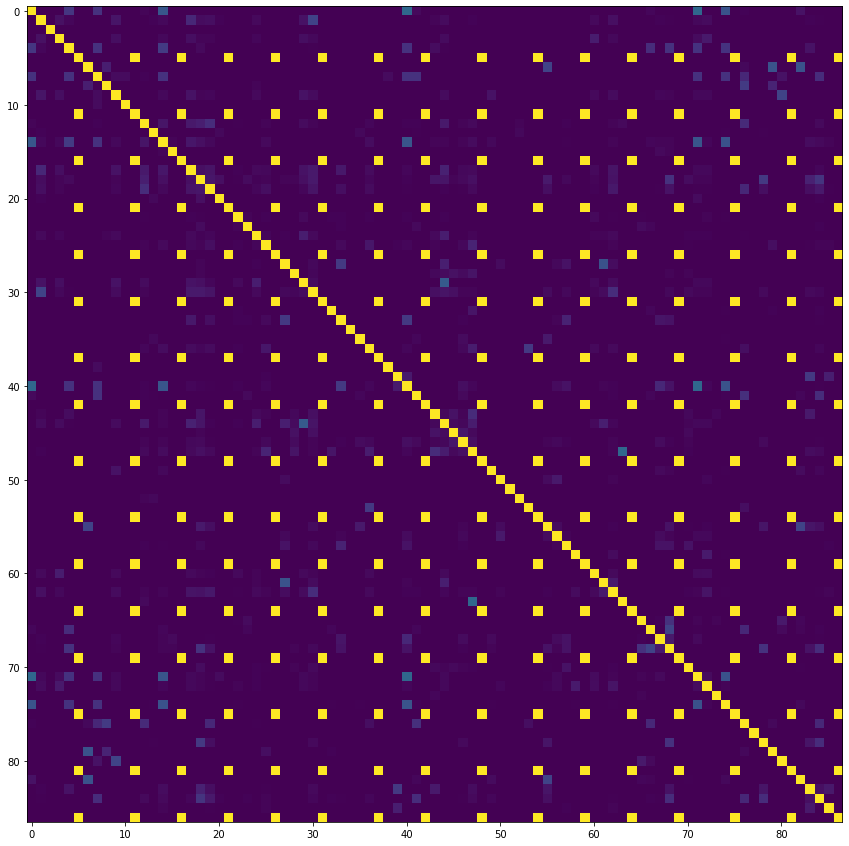

In [44]:
pylab.figure(figsize = (15,15))
pylab.imshow(np.array(sims[:-1]))# interpolation='nearest')

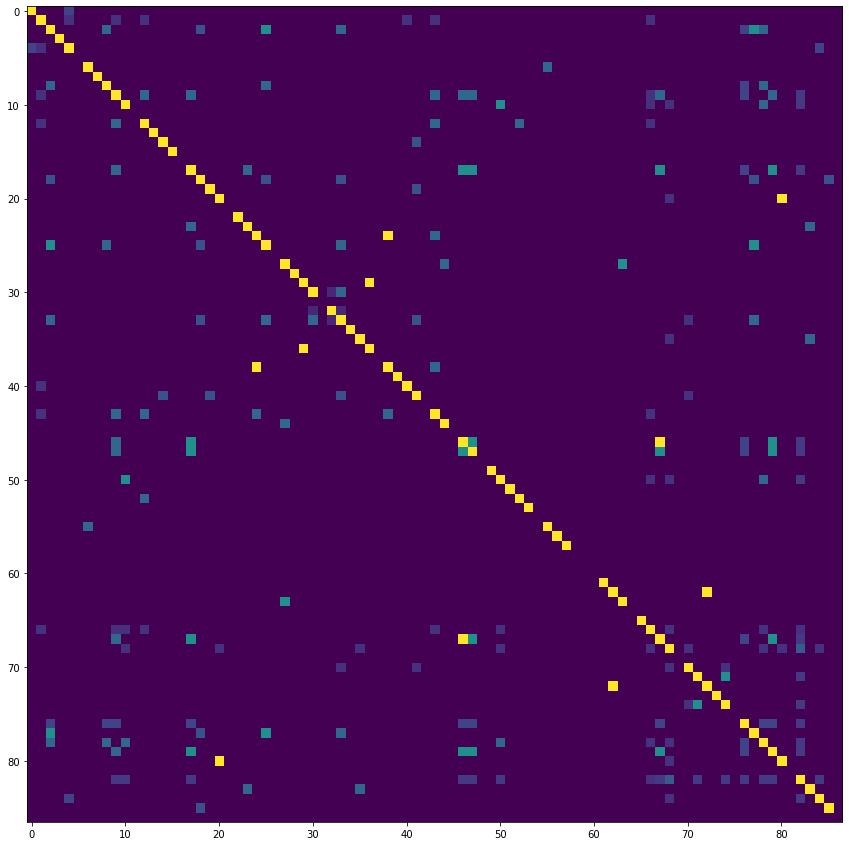

In [45]:
pylab.figure(figsize = (15,15))
pylab.imshow(np.array(v_sims[:-1]))# interpolation='nearest')